<a href="https://colab.research.google.com/github/vuaanhua/bui-le-anh-vu-20104073/blob/main/project_cu%E1%BB%91i_k%C3%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.model_selection import train_test_split
from google.colab import drive
import matplotlib.pyplot as plt
import os
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import SGD, RMSprop
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.utils import validation 
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd /content/drive/MyDrive/Colab Notebooks/NCTTVN/nhaccu

/content/drive/MyDrive/Colab Notebooks/NCTTVN/nhaccu


In [4]:
train_datagen=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [5]:
training_set=train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/NCTTVN/nhaccu/train',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 208 images belonging to 7 classes.


In [6]:
input =train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/NCTTVN/nhaccu/input',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 101 images belonging to 7 classes.


In [7]:
training_set.class_indices

{'sáo trúc': 0,
 'đàn bầu': 1,
 'đàn nguyệt': 2,
 'đàn nhị': 3,
 'đàn tranh': 4,
 'đàn tùy bà': 5,
 'đàn đáy': 6}

In [8]:
input.class_indices

{'sáo trúc': 0,
 'đàn bầu': 1,
 'đàn nguyệt': 2,
 'đàn nhị': 3,
 'đàn tranh': 4,
 'đàn tùy bà': 5,
 'đàn đáy': 6}

In [9]:
model = Sequential()
model.add(Conv2D(32,(3,3), activation = 'relu', kernel_initializer='he_uniform', input_shape=(150,150,3)))
model.add(Conv2D(32,(3,3), activation = 'relu', kernel_initializer='he_uniform', padding = 'same'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))

In [10]:
model.add(Flatten())

In [11]:
model.add(Dense(128, activation = 'relu', kernel_initializer = 'he_uniform'))
model.add(Dropout(0.2))

In [12]:
model.add(Dense(7, activation = 'softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 148, 148, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 74, 74, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 74, 74, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                    

In [13]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [15]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(training_set, epochs = 50, batch_size=128, verbose = 1, validation_data = input, callbacks = [EarlyStopping(monitor='val_loss', patience=30)])

Epoch 1/50
7/7 [==============================] - 93s 12s/step - loss: 2.8798 - accuracy: 0.2644 - val_loss: 1.8083 - val_accuracy: 0.2574
Epoch 2/50
7/7 [==============================] - 6s 843ms/step - loss: 1.7576 - accuracy: 0.4038 - val_loss: 1.7938 - val_accuracy: 0.2574
Epoch 3/50
7/7 [==============================] - 6s 850ms/step - loss: 1.7217 - accuracy: 0.4135 - val_loss: 1.7165 - val_accuracy: 0.2574
Epoch 4/50
7/7 [==============================] - 6s 816ms/step - loss: 1.6986 - accuracy: 0.4038 - val_loss: 1.7102 - val_accuracy: 0.2574
Epoch 5/50
7/7 [==============================] - 6s 810ms/step - loss: 1.6338 - accuracy: 0.4135 - val_loss: 1.7140 - val_accuracy: 0.2574
Epoch 6/50
7/7 [==============================] - 6s 845ms/step - loss: 1.5947 - accuracy: 0.4279 - val_loss: 1.5678 - val_accuracy: 0.3366
Epoch 7/50
7/7 [==============================] - 6s 873ms/step - loss: 1.5235 - accuracy: 0.4471 - val_loss: 1.4316 - val_accuracy: 0.4257
Epoch 8/50
7/7 [=====

In [20]:
Score = model.evaluate(training_set, verbose = 0)
print('train loss', Score[0])
print('train accuracy', Score[1])

train loss 0.10623086988925934
train accuracy 0.9663461446762085


In [21]:
model.save("nhaccutruyenthong.h5")

In [22]:
model_CNN = load_model('nhaccutruyenthong.h5')

1/1 [==============================] - 0s 19ms/step
đàn tranh


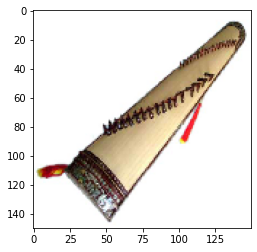

1/1 [==============================] - 0s 20ms/step
đàn bầu


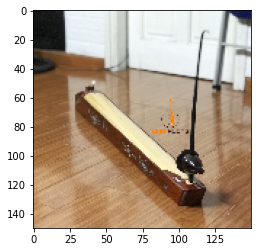

1/1 [==============================] - 0s 17ms/step
đàn nguyệt


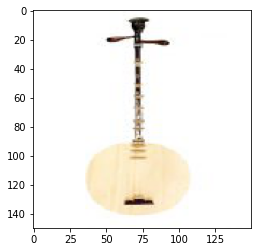

1/1 [==============================] - 0s 17ms/step
sáo trúc


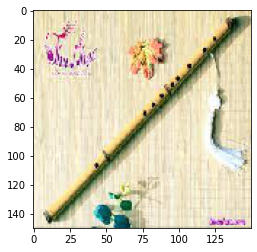

1/1 [==============================] - 0s 15ms/step
đàn nhị


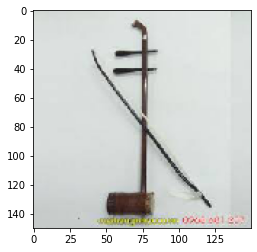

1/1 [==============================] - 0s 17ms/step
đàn nhị


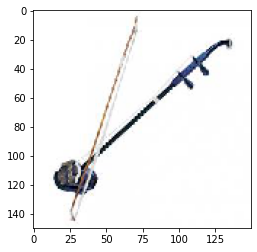

1/1 [==============================] - 0s 17ms/step
đàn đáy


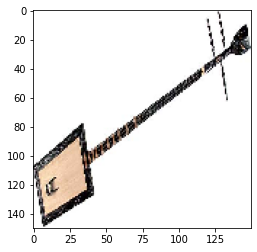

In [28]:
test= "/content/drive/MyDrive/Colab Notebooks/NCTTVN/nhaccu/test/"

for i in os.listdir(test):
  img = load_img(test+'/'+i, target_size=(150,150))
  plt.imshow(img)
  img=img_to_array(img)
  img=img.astype('float32')
  img= img/255
  img = np.expand_dims(img, axis = 0)
  result = model_CNN.predict(img)
  if round(result[0][0]) == 1:
    prediction = 'sáo trúc'
  if round(result[0][1]) == 1:
    prediction = 'đàn bầu'
  if round(result[0][2]) == 1:
    prediction = 'đàn nguyệt'
  if round(result[0][3]) == 1:
    prediction = 'đàn nhị'  
  if round(result[0][4]) == 1:
    prediction = 'đàn tranh'
  if round(result[0][5]) == 1:
    prediction = 'đàn tùy bà'
  if round(result[0][6]) == 1:
    prediction =  'đàn đáy'
 
  print(prediction)
  plt.show()